In [ ]:
# Import the files module from the google.colab library, which allows file uploads
from google.colab import files

# Call the upload() function to open a file picker and upload files from your local machine
# The uploaded files are stored in the 'uploaded' variable as a dictionary
uploaded = files.upload()

Saving archive.zip to archive.zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("BrainMRI")

DATA_DIR = "/content/BrainMRI"


In [ ]:
!pip install seaborn matplotlib


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 150
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 406 images belonging to 3 classes.
Found 100 images belonging to 3 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, validation_data=val_data, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.1900 - loss: 0.6199 - val_accuracy: 0.1900 - val_loss: 0.5139
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.1906 - loss: 0.5931 - val_accuracy: 0.1900 - val_loss: 0.3028
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.1792 - loss: 0.4964 - val_accuracy: 0.1900 - val_loss: 0.4072
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.2167 - loss: 0.5162 - val_accuracy: 0.1900 - val_loss: 0.3427
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.2033 - loss: 0.4707 - val_accuracy: 0.1900 - val_loss: 0.3238
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.1963 - loss: 0.4684 - val_accuracy: 0.1900 - val_loss: 0.3858
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.2248 - loss: 0.5512 - val_accuracy: 0.1900 - val_loss: 0.3986
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.1784 - loss: 0.4323 - val_accuracy: 0.1900 - val_loss:

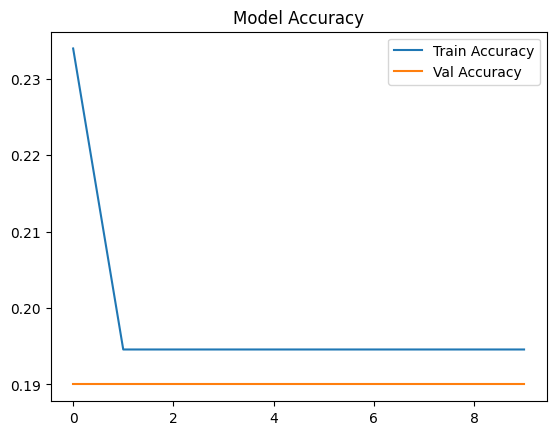

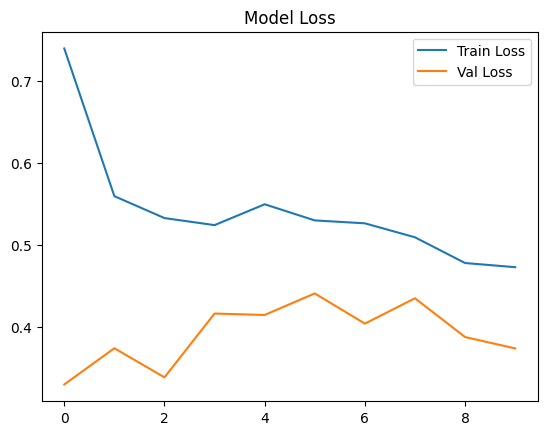

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 417ms/step


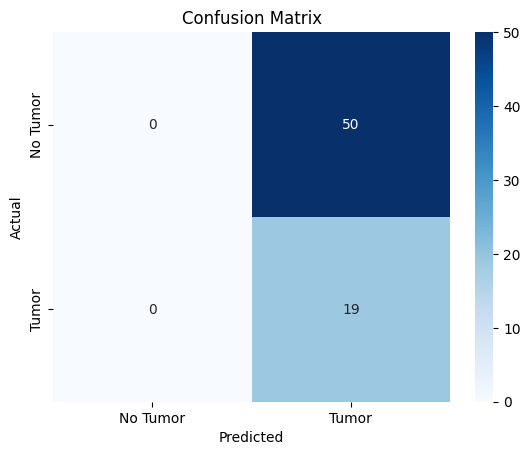

              precision    recall  f1-score   support

          No       0.00      0.00      0.00        50
         Yes       0.28      1.00      0.43        19

    accuracy                           0.28        69
   macro avg       0.14      0.50      0.22        69
weighted avg       0.08      0.28      0.12        69



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib here if not already imported in this cell

val_data.reset()
preds = model.predict(val_data)
y_pred_raw = (preds > 0.5).astype("int32").flatten()
y_true_raw = val_data.classes

# Filter y_true and y_pred to only include the expected binary classes (0 and 1)
# Find the indices where the true label is either 0 or 1
valid_indices = np.where((y_true_raw == 0) | (y_true_raw == 1))[0]

# Select only the values at these valid indices
y_true = y_true_raw[valid_indices]
y_pred = y_pred_raw[valid_indices]


# Confusion matrix
# Ensure the confusion matrix uses the filtered y_true and y_pred
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Pass the filtered y_true and y_pred to classification_report
print(classification_report(y_true, y_pred, target_names=['No', 'Yes']))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


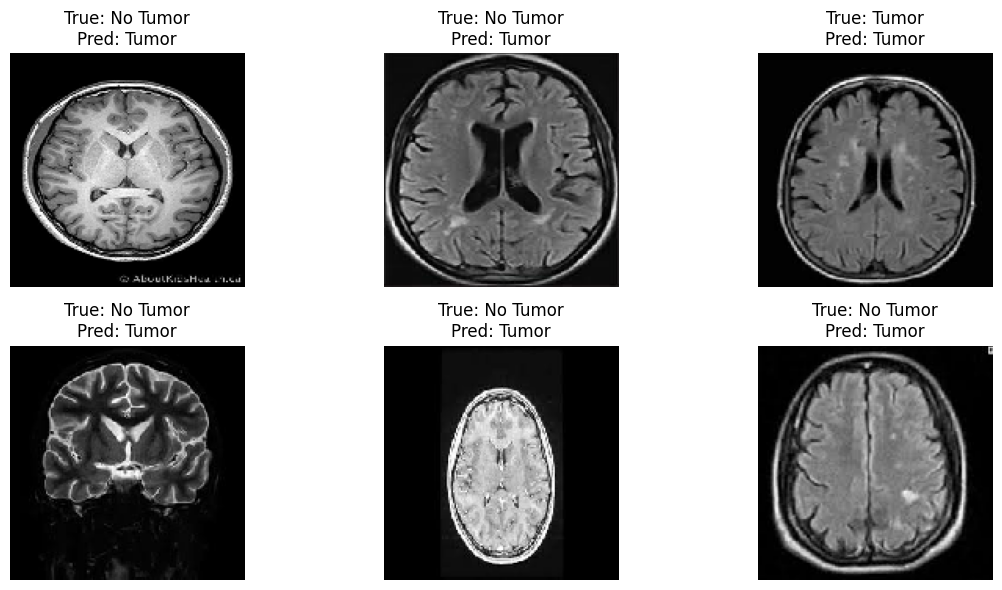

In [ ]:
val_data.reset()
images, labels = next(val_data)

plt.figure(figsize=(12, 6))
for i in range(6):
    idx = np.random.randint(0, len(images))
    img = images[idx]
    true = labels[idx]
    pred = model.predict(np.expand_dims(img, axis=0))[0][0]

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"True: {'Tumor' if true == 1 else 'No Tumor'}\nPred: {'Tumor' if pred > 0.5 else 'No Tumor'}")
    plt.axis('off')

plt.tight_layout()
plt.show()
